In [2]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import json
from tqdm import tqdm

sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.precompute.accretion import Mdot_Edd, L_ADAF, e0_a

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../../matplotlibrc')

In [3]:
delta_s = [1e-3, 1e-2, 0.1, 0.5]
Mratio_s = np.geomspace(1e-8, 1e-1, 300)

def get_epsilon(Mratio, delta):
    e0, a = e0_a(Mratio, delta)
    return e0 * (100 * Mratio)**a

eps_d = {}

for delta in tqdm(delta_s):
    eps_d[delta] = np.array([get_epsilon(Mratio, delta) for Mratio in Mratio_s])

100%|██████████| 4/4 [00:02<00:00,  1.36it/s]


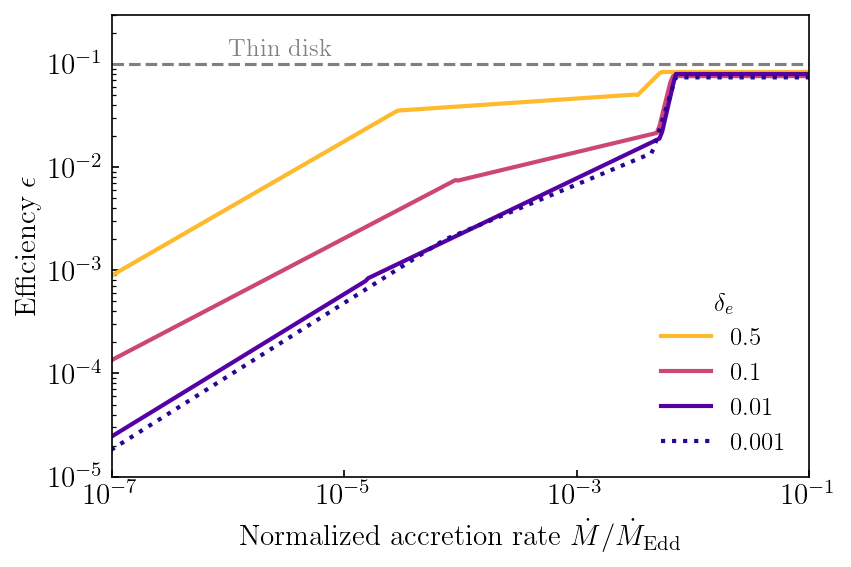

In [12]:
delta_s = [0.5, 0.1, 1e-2, 1e-3]

delta_text_d = {
    1e-3: r'$0.001$',
    1e-2: r'$0.01$',
    0.1: r'$0.1$',
    0.5: r'$0.5$'
}
color_s = mpl.colormaps['plasma']([0.85, 0.50, 0.15, 0.05])
alpha_s = [1., 1., 1., 1]
ls_s = ['-', '-', '-', ':']

fig, ax = plt.subplots(figsize=(6, 4))

for i, delta in enumerate(delta_s):
    ax.plot(Mratio_s, eps_d[delta], label=delta_text_d[delta],
            color=color_s[i], alpha=alpha_s[i], ls=ls_s[i])

ax.axhline(0.1, color='gray', linestyle='--', lw=1.5)
ax.text(1e-6, 0.12, 'Thin disk', color='gray', fontsize=12)

ax.set(xscale='log', yscale='log')
ax.set(xlim=(1e-7, 1e-1), ylim=(1e-5, 3e-1))
ax.set(xlabel=r'Normalized accretion rate $\dot{M}/\dot{M}_{\rm Edd}$', ylabel=r'Efficiency $\epsilon$');

ax.legend(frameon=False, title=r'$\delta_e$', loc='lower right')

fig.savefig('e-Mratio.pdf', bbox_inches='tight')